In [3]:
import IPython.core.display as di
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ignore code when downloaded as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# Read file
df = pd.read_csv('dataset/liver_data_inf560.csv',header = 0, na_values = 'NaN')

dtypes: float64(60), int64(23), object(76)

In [4]:
#Basic translation
df = df.replace("Unknown", np.nan) #Replace 'Unknown; with NaN for further processing
df = df.replace(998, np.nan) #998 means Unknown
df = df.replace(997, np.nan) #997 means N/A
df = df.replace(996, np.nan) #996 means N/A not sure?

In [5]:
#According to LIVER_FORMATC_LOOKUP
column_name = 'FUNC_STAT_TRR'
df.loc[df.FUNC_STAT_TRR == 1.0, column_name] = 10
df.loc[df.FUNC_STAT_TRR == 2.0, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 3.0, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 2010, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 2020, column_name] = 2
df.loc[df.FUNC_STAT_TRR == 2030, column_name] = 3
df.loc[df.FUNC_STAT_TRR == 2040, column_name] = 4
df.loc[df.FUNC_STAT_TRR == 2050, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 2060, column_name] = 6
df.loc[df.FUNC_STAT_TRR == 2070, column_name] = 7
df.loc[df.FUNC_STAT_TRR == 2080, column_name] = 8
df.loc[df.FUNC_STAT_TRR == 2090, column_name] = 9
df.loc[df.FUNC_STAT_TRR == 2100, column_name] = 10
df.loc[df.FUNC_STAT_TRR == 4010, column_name] = 1
df.loc[df.FUNC_STAT_TRR == 4020, column_name] = 2
df.loc[df.FUNC_STAT_TRR == 4030, column_name] = 3
df.loc[df.FUNC_STAT_TRR == 4040, column_name] = 4
df.loc[df.FUNC_STAT_TRR == 4050, column_name] = 5
df.loc[df.FUNC_STAT_TRR == 4060, column_name] = 6
df.loc[df.FUNC_STAT_TRR == 4070, column_name] = 7
df.loc[df.FUNC_STAT_TRR == 4080, column_name] = 8
df.loc[df.FUNC_STAT_TRR == 4090, column_name] = 9
df.loc[df.FUNC_STAT_TRR == 4100, column_name] = 10

In [6]:
#numeralization
df['AGE_GROUP'] = df['AGE_GROUP'].replace('A',1)
df['AGE_GROUP'] = df['AGE_GROUP'].replace('P',0)
#df[['AGE_GROUP']].head(5)

In [7]:
#numeralization
df =  df.replace('M', 0) #'M' means male
df =  df.replace('F', 1) #'F' means female

In [8]:
#df[df.END_STAT].between(6101, 6199, inclusive=True)
#df[['END_STAT']].query('6101 <= END_STAT <= 6199') #negative meld score
#df[df['END_STAT']==6999] #Inactive means Unknown, cuz the patients records not updated
#df[['END_STAT']].query('6010 <= END_STAT <= 6012') Don't know what status1 status2 mean..
# def END_STAT_CALCULATOR(x):
#     if x>=6101 and x<=6200:
#         return 6200-x
#     elif x>=6201 and x<=6299:
#         return x-6200
#     elif x==6999:
#         return np.nan

In [9]:
#df['END_STAT'] = df.END_STAT.apply(END_STAT_CALCULATOR)

In [10]:
#one hot encoding
pd.get_dummies(df['ABO'],prefix='BLOOD_TYPE')
df = pd.concat([df, pd.get_dummies(df['ABO'],prefix='BLOOD_TYPE')], axis=1)
df.drop(['ABO'], axis=1, inplace=True)
#df[['BLOOD_TYPE_A','BLOOD_TYPE_A1','BLOOD_TYPE_A2','BLOOD_TYPE_B','BLOOD_TYPE_O','BLOOD_TYPE_AB','BLOOD_TYPE_A1B','BLOOD_TYPE_A2B']].head(5)

In [11]:
#one hot encoding
pd.get_dummies(df['ABO_DON'],prefix='DON_BLOOD_TYPE')
df = pd.concat([df, pd.get_dummies(df['ABO_DON'],prefix='DON_BLOOD_TYPE')], axis=1)
df.drop(['ABO_DON'], axis=1, inplace=True)
#df[['DON_BLOOD_TYPE_A','DON_BLOOD_TYPE_A1','DON_BLOOD_TYPE_A2','DON_BLOOD_TYPE_B','DON_BLOOD_TYPE_O','DON_BLOOD_TYPE_AB','DON_BLOOD_TYPE_A1B','DON_BLOOD_TYPE_A2B']].head(5)

In [12]:
#one hot encoding
df['ETHCAT'] = df['ETHCAT'].replace(1,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(2,'Black')
df['ETHCAT'] = df['ETHCAT'].replace(4,'Hispanic')
df['ETHCAT'] = df['ETHCAT'].replace(5,'Asian')
df['ETHCAT'] = df['ETHCAT'].replace(6,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(7,'Others')
df['ETHCAT'] = df['ETHCAT'].replace(9,'Multiracial')
pd.get_dummies(df['ETHCAT'],prefix='ETHCAT')
df = pd.concat([df, pd.get_dummies(df['ETHCAT'],prefix='ETHCAT')], axis=1)
df.drop(['ETHCAT'], axis=1, inplace=True)

In [13]:
#one hot encoding
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(1,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(2,'Black')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(4,'Hispanic')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(5,'Asian')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(6,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(7,'Others')
df['ETHCAT_DON'] = df['ETHCAT_DON'].replace(9,'Multiracial')
pd.get_dummies(df['ETHCAT_DON'],prefix='ETHCAT_DON')
df = pd.concat([df, pd.get_dummies(df['ETHCAT_DON'],prefix='ETHCAT_DON')], axis=1)
df.drop(['ETHCAT_DON'], axis=1, inplace=True)

In [14]:
#numeralization
df.loc[df['DON_TY'] == 'C','DON_TY'] = 0  
df.loc[df['DON_TY'] == 'L','DON_TY'] = 1 

In [15]:
#numeralization
def replaceEXC_HCC(hcc):
    if hcc == 'non-HCC':
        hcc = 1
    elif hcc == "HCC":
        hcc = 0
    elif hcc == "HBL":
        hcc = 1
    return hcc
df['EXC_HCC'] = df.EXC_HCC.apply(replaceEXC_HCC)

In [16]:
#numeralization
df =  df.replace('N', 0) #'N' means No
df =  df.replace('No', 0) #'No' means No
df =  df.replace('Y', 1) #'Y' means Yes
df =  df.replace('Yes', 1) #'Yes' means Yes

In [17]:
#DATA_TRANSPLANT,DATA_WAITLIST, LIST_MELD, TX_MELD have all the same values for one column
df.drop(['DATA_TRANSPLANT'],axis=1,inplace=True) 
df.drop(['DATA_WAITLIST'],axis=1,inplace=True) 
df.drop(['LIST_MELD'],axis=1,inplace=True) 
df.drop(['TX_MELD'],axis=1,inplace=True) 

In [18]:
#numeralization
df =  df.replace(['PD', 'ND', 'I', 'C', 'U'], np.nan) 
df =  df.replace('P', 1)

In [19]:
#numeralization
df['TXLIV'] =  df['TXLIV'].replace('W', 1)
df['TXLIV'] =  df['TXLIV'].replace('S', 0)

In [20]:
#numeralization
df['PX_STAT'] =  df['PX_STAT'].replace(['R', 'D'], 0)
df['PX_STAT'] =  df['PX_STAT'].replace('A', 1)
df['PX_STAT'] =  df['PX_STAT'].replace('L', np.nan)

In [21]:
#Highly relevant 
df.drop(['FINAL_MELD_OR_PELD'],axis=1,inplace=True)

In [22]:
#No use
df.drop(['ETHNICITY'],axis=1,inplace=True)

In [23]:
#Already have distance, need no geo info
df.drop(['HOME_STATE_DON'],axis=1,inplace=True) 
df.drop(['REGION'],axis=1,inplace=True) 
df.drop(['PERM_STATE'],axis=1,inplace=True) #axis=1 列操作， inplace=True 原数据中删除
df.drop(['PERM_STATE_TRR'],axis=1,inplace=True)

In [24]:
#Useless ID codes
df.drop(['WL_ID_CODE'],axis=1,inplace=True)
df.drop(['TRR_ID_CODE'],axis=1,inplace=True)
df.drop(['DONOR_ID'],axis=1,inplace=True)
df.drop(['CTR_CODE'],axis=1,inplace=True)
df.drop(['OPO_CTR_CODE'],axis=1,inplace=True)
df.drop(['LISTING_CTR_CODE'],axis=1,inplace=True)

In [25]:
#For now
df.drop(['DIAG'],axis = 1,inplace = True)

In [26]:
#Too many missing values
df.drop(['EBV_SEROSTATUS'],axis=1,inplace=True) #25.8%
df.drop(['CMV_IGG'],axis=1,inplace=True) #20.9%
df.drop(['CMV_IGM'],axis=1,inplace=True) #51.2%
df.drop(['DEATH_CIRCUM_DON'],axis=1,inplace=True) #22.2%

In [27]:
#Turn its type into int
df= df[df['FINAL_DIALYSIS_PRIOR_WEEK']!="A"]
df['FINAL_DIALYSIS_PRIOR_WEEK'] = pd.to_numeric(df['FINAL_DIALYSIS_PRIOR_WEEK'])

## Drop highly correlated attributes

In [28]:
corrnew = df.corr(method='pearson', min_periods=1)

In [29]:
# for x in range(len(corrnew)):
#     for y in range(len(corrnew)):
#         if x!=y and x<y:
#             if corrnew.iloc[x,y] >= 0.8 or corrnew.iloc[x,y] <= -0.8:
#                 print corrnew.columns[x],corrnew.columns[y]

<b>END_BMI_CALC</b>: WGT_KG_CALC, BMI_CALC  
<b>FINAL_INR</b>: INR_TX  
<b>FINAL_MELD_PELD_LAB_SCORE</b>: MELD_PELD_LAB_SCORE  
<b>GSTATUS</b>: PX_STAT  
<b>WGT_KG_DON_CALC</b>: BMI_DON_CALC  
<b>AGE_GROUP</b>: AGE, HGT_CM_CALC  
Drop highly related attributes

In [30]:
df.drop(['WGT_KG_CALC'],axis=1,inplace=True)
df.drop(['BMI_CALC'],axis=1,inplace=True)
df.drop(['INR_TX'],axis=1,inplace=True)
df.drop(['MELD_PELD_LAB_SCORE'],axis=1,inplace=True)
df.drop(['PX_STAT'],axis=1,inplace=True)
df.drop(['BMI_DON_CALC'],axis=1,inplace=True)
df.drop(['AGE'],axis=1,inplace=True)
df.drop(['HGT_CM_CALC'],axis=1,inplace=True)

In [31]:
df.drop(['TX_YEAR'],axis=1,inplace=True) #Assume tech doesn't change according to year
df.drop(['LISTYR'],axis=1,inplace=True)

## Drop noise

In [36]:
tmp= df.drop(df[df.PTIME < df.GTIME].index)

(42492, 150)

# drop PSTATUS & PTIME

In [30]:
df.drop(['PSTATUS'],axis=1,inplace=True)
df.drop(['PTIME'],axis=1,inplace=True)

## Labeling

In [31]:
day=180
tmp = df[(df.GTIME >= day) | (df.GSTATUS == 1) ] 
tmp["label"]=tmp.apply(lambda x: x.GTIME<day, axis=1).astype(int)
tmp = tmp.drop(columns=["GTIME", "GSTATUS"])

e:\anaconda\envs\default\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# hear we can draw a line chart

In [32]:
from sklearn.preprocessing import Imputer
impute=Imputer()
result=impute.fit_transform(tmp)
result=pd.DataFrame(result, columns=tmp.columns)
#x=result.iloc[:, :-1]
#y=result["label"]

# show class distribution

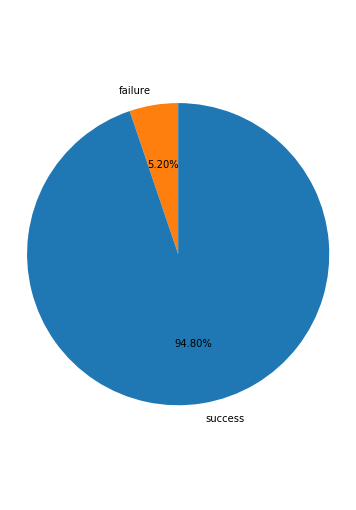

In [33]:
from matplotlib import pyplot as plt
failure=tmp["label"].sum()
success=len( tmp["label"] ) -failure

plt.figure(figsize=(6,9)) #调节图形大小
labels = ['failure','success'] #定义标签
sizes = [failure, success] #每块值
colors = ['tab:orange','tab:blue'] #每块颜色定义
explode = (0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.show()

## Normalization

In [34]:
normalized_df=(result-result.min())/(result.max()-result.min())
#result

In [35]:
#normalized_df

## Current Status

In [36]:
#normalized_df.describe().T['mean']

In [37]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74673 entries, 0 to 74672
Columns: 147 entries, NUM_PREV_TX to label
dtypes: float64(147)
memory usage: 83.7 MB


In [38]:
#normalized_df.to_csv("cleaned_liver.csv")

# functions for model training
## I used wrong metric(macro) before

In [151]:
x=normalized_df.iloc[:, :-1]
y=normalized_df["label"]

from sklearn.model_selection import cross_validate

def getScore(model, x, y):
    s=['f1', 'recall','precision', 'accuracy', 'roc_auc']
    scores = cross_validate(model, x, y, scoring=s, cv=5)
    result={}
    for k,v in scores.items():
        result[k]= sum(v)/len(v)
    return result

# Logistic Regression
(0.4869024608691316, f1 score
 0.5239925812604895, precision
 0.5001216369841882, recall
 0.9479731629346559) accuray

In [154]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
getScore(lr, x, y)

e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: Undef

{'fit_time': 2.4120811462402343,
 'score_time': 0.03830313682556152,
 'test_f1': 0.0005134788189987162,
 'train_f1': 0.0005144281106043175,
 'test_recall': 0.0002574002574002574,
 'train_recall': 0.0002574002574002574,
 'test_precision': 0.1,
 'train_precision': 0.36666666666666664,
 'test_accuracy': 0.9479731629346559,
 'train_accuracy': 0.9479698150344135,
 'test_roc_auc': 0.5682202583549718,
 'train_roc_auc': 0.6063546847740389}

# SVM  use linear kernel instead due to speed

In [41]:
# from sklearn import svm
# svm1=svm.SVC(kernel="linear")
# getScore(svm1, x, y)

# Decision Tree
(0.5085088271992606,
 0.5082232403159137,
 0.5102716469826617,
 0.8899603832131998)

In [153]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
getScore(dt, x, y)

{'fit_time': 5.04480209350586,
 'score_time': 0.0800368309020996,
 'test_f1': 0.07601695135618566,
 'train_f1': 1.0,
 'test_recall': 0.08725868725868727,
 'train_recall': 1.0,
 'test_precision': 0.0676168975115303,
 'train_precision': 1.0,
 'test_accuracy': 0.8900004819778614,
 'train_accuracy': 1.0,
 'test_roc_auc': 0.5106577064577038,
 'train_roc_auc': 1.0}

# k-NN

In [43]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# getScore(knn, x, y)

# Random Forest
(0.48660354986997795,
 0.4739824000579354,
 0.4999152412680261,
 0.9478124647903965)

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
getScore(rf, x, y)

e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\anaconda\envs\default\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'fit_time': 2.36509690284729,
 'score_time': 0.27440767288208007,
 'test_f1': 0.0010269593303012328,
 'train_f1': 0.8709381529596136,
 'test_recall': 0.0005148005148005148,
 'train_recall': 0.7714285714285716,
 'test_precision': 0.26666666666666666,
 'train_precision': 1.0,
 'test_accuracy': 0.9478660302406811,
 'train_accuracy': 0.9881081539049325,
 'test_roc_auc': 0.5236187040396674,
 'train_roc_auc': 0.9998882943032598}

# Random Forest Hyperparameter tuning

In [190]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred=rf.predict_proba(x_test)
y_pred=list( map(lambda x: x[1], y_pred))
roc_auc_score(y_test, y_pred)

0.559003959173833

# XGBoost (GBDT)

(0.05348460291734198, 0.02773109243697479, 0.036524626452684, None)

# Try under/over sampling (seems not working)

In [163]:
# split train & test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# stratifiedSplit= StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1)

# for train_index, test_index in stratifiedSplit.split(x,y):
#     x_train, x_test=x.iloc[train_index], x.iloc[test_index]
#     y_train, y_test=y.iloc[train_index], y.iloc[test_index]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=3)


## Without oversampling

In [183]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict_proba(x_test)
y_pred=list( map(lambda x: x[1], y_pred))
roc_auc_score(y_test, y_pred)

0.5337976633674846

## Over-sampling the training_set (almost same)
https://beckernick.github.io/oversampling-modeling/

In [185]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled= SMOTE().fit_sample(x_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_resampled, y_resampled)
y_pred=rf.predict_proba(x_test)
y_pred=list( map(lambda x: x[1], y_pred))
roc_auc_score(y_test, y_pred)

0.5067880078500726

In [168]:
lr=LogisticRegression()
rf.fit(x_resampled, y_resampled)`
y_pred=rf.predict(x_test)

roc_auc_score(y_test, y_pred)

0.4995294339089925

## Oversampling the whole dataset (wrong way)

In [98]:
x_r, y_r= SMOTE().fit_sample(x_test, y_test)
yyy=rf.predict(x_r)
f1_score(y_r, yyy)

0.9264263885030182

# add weight to loss function

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight="balanced", n_estimators=30)
rf.fit(x_train, y_train)
y_pred=rf.predict_proba(x_test)
y_pred=list( map(lambda x: x[1], y_pred))
roc_auc_score(y_test, y_pred)

0.5318017027133511